In [15]:

!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import plotly.offline as pyo
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.graph_objs as go
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyo
from wordcloud import WordCloud, STOPWORDS

In [17]:
data = pd.read_csv(r"C:/Users/prach/OneDrive/Desktop/pomogranate/nb model/Crop_recommendation.csv")

# Selecting relevant features
df = data[["N", "P", "K", "temperature", "humidity", "rainfall", "ph", "label"]]

In [19]:
df

,N,P,K,temperature,humidity,rainfall,ph,label
0,90,42,43,20.879744,82.002744,202.935536,6.502985,rice
1,85,58,41,21.770462,80.319644,226.655537,7.038096,rice
2,60,55,44,23.004459,82.320763,263.964248,7.840207,rice
3,74,35,40,26.491096,80.158363,242.864034,6.980401,rice
4,78,42,42,20.130175,81.604873,262.717340,7.628473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,177.774507,6.780064,coffee
2196,99,15,27,27.417112,56.636362,127.924610,6.086922,coffee
2197,118,33,30,24.131797,67.225123,173.322839,6.362608,coffee
2198,117,32,34,26.272418,52.127394,127.175293,6.758793,coffee


In [20]:
df.shape

(2200, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   ph           2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [22]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
rainfall       0
ph             0
label          0
dtype: int64

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df

,N,P,K,temperature,humidity,rainfall,ph,label
0,90,42,43,20.879744,82.002744,202.935536,6.502985,20
1,85,58,41,21.770462,80.319644,226.655537,7.038096,20
2,60,55,44,23.004459,82.320763,263.964248,7.840207,20
3,74,35,40,26.491096,80.158363,242.864034,6.980401,20
4,78,42,42,20.130175,81.604873,262.717340,7.628473,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,177.774507,6.780064,5
2196,99,15,27,27.417112,56.636362,127.924610,6.086922,5
2197,118,33,30,24.131797,67.225123,173.322839,6.362608,5
2198,117,32,34,26.272418,52.127394,127.175293,6.758793,5


In [25]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

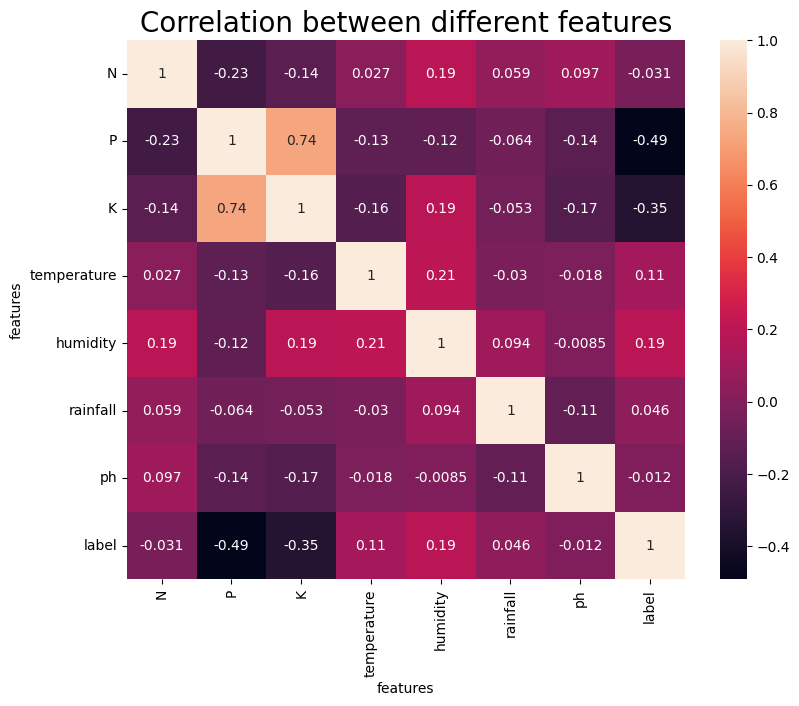

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

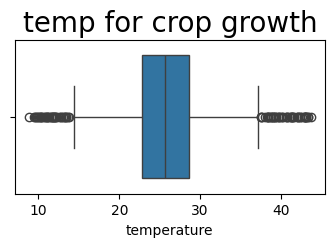

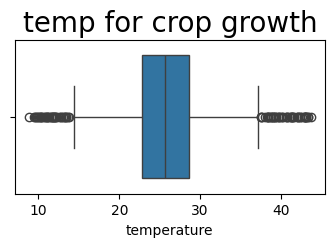

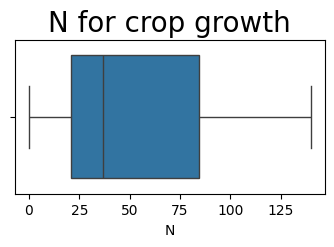

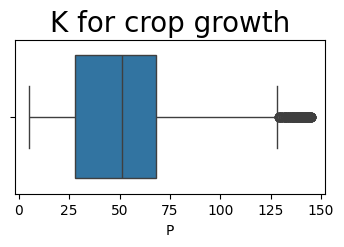

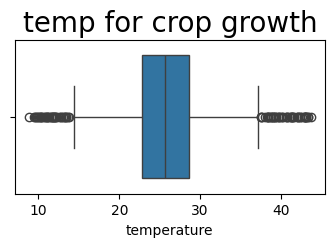

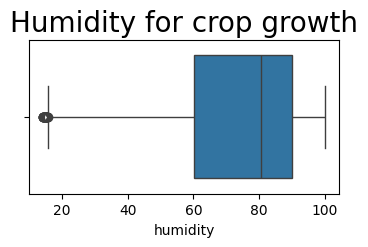

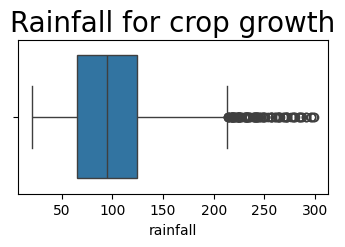

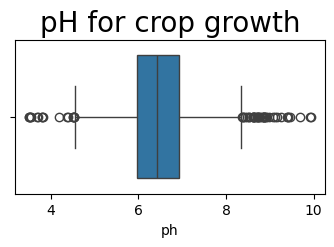

In [27]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df.temperature);
plt.title("temp for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.temperature);
plt.title("temp for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.N);
plt.title("N for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.P);
plt.title("K for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.temperature);
plt.title("temp for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.humidity);
plt.title("Humidity for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.rainfall);
plt.title("Rainfall for crop growth",{'fontsize':20});

plt.figure(figsize=(4,2))
sns.boxplot(x=df.ph);
plt.title("pH for crop growth",{'fontsize':20});

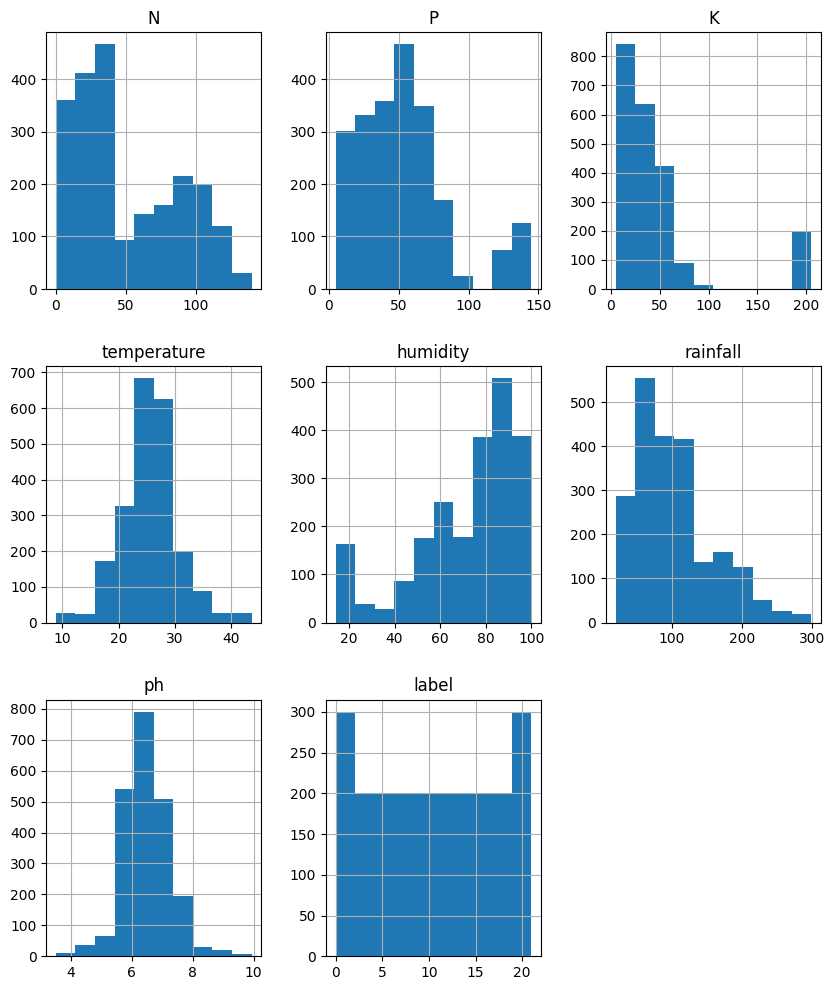

In [28]:
df.hist(figsize=(10,12))
plt.show()

In [32]:
x = df.drop(columns=['label']) 
# Scaling features to avoid bias due to differing ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)



In [33]:
 #Convert to DataFrame and check for NaNs after scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
if X_scaled_df.isna().sum().sum() > 0:
    X_scaled_df.fillna(0, inplace=True)  # Replace NaNs with 0

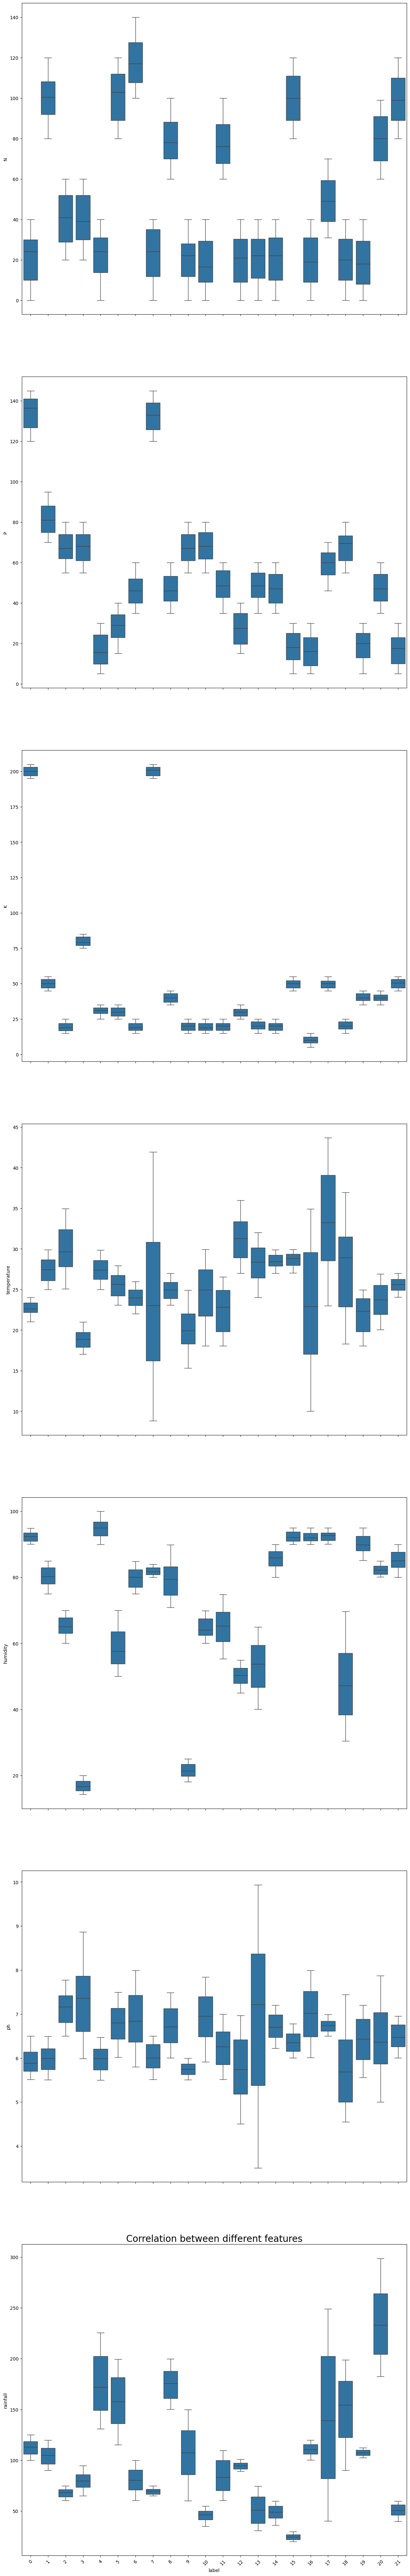

In [36]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']


fig, ax = plt.subplots(7, 1, figsize=(15, 100), sharex=True)

i = 0
for column in columns:
    sns.boxplot(data=df, x='label', y=column, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

In [38]:
target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

x = df[features]
y = df[target]


In [39]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, shuffle=True)

In [40]:
models = {
    DecisionTreeClassifier(random_state=0):'Decision Tree',
    GaussianNB():'Naive Bayes Classidfier',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine',
    KNeighborsClassifier():'K Neighbors Classifier'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Decision Tree is :  97.2451790633609 %
Accuracy Score for Naive Bayes Classidfier is :  99.44903581267218 %
Accuracy Score for Random Forest is :  99.17355371900827 %
Accuracy Score for Support Vector Machine is :  96.41873278236915 %
Accuracy Score for K Neighbors Classifier is :  97.52066115702479 %


In [41]:
model1=GaussianNB()
model1.fit(X_train,y_train)
y_recmd=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_recmd)

print(metrics.classification_report(y_test,y_recmd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.98        29
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        35
           5       1.00      0.97      0.98        33
           6       0.94      1.00      0.97        33
           7       1.00      1.00      1.00        25
           8       0.83      0.97      0.89        35
           9       0.91      1.00      0.95        41
          10       0.93      0.96      0.95        28
          11       1.00      0.94      0.97        32
          12       1.00      1.00      1.00        34
          13       0.97      0.95      0.96        38
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        27
          17       1.00    

In [42]:
data = np.array([[30,40,30,40,60,7.5,100]])
recommendation = model1.predict(data)
print(recommendation)

[12]


In [43]:
data = np.array([[40,50,50,20,100,6.7,200]])
recommendation = model1.predict(data)
print(recommendation)

[17]


In [44]:
data = np.array([[40,50,50,30,30,7,1042]])
recommendation = model1.predict(data)
print(recommendation)

[18]
